In [1]:
# Visualisation / Plotting
import seaborn as sea
import matplotlib.pyplot as plt

# Feature Extractions / Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Metric
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Data Structure
import string 
import numpy as np
import pickle
import pandas as pd
from sklearn.externals import joblib

In [2]:
#load Csv
df = pd.read_csv("news_dataset.csv", encoding='utf-8')
df['label'].value_counts()

real    15712
fake    12999
Name: label, dtype: int64

In [3]:
#Display top 5 rows of dataframe
df.head(5)

,Unnamed: 0,title,content,publication,label
0,0,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup,fake
1,1,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup,fake
2,2,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup,fake
3,3,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup,fake
4,4,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup,fake


In [4]:
# Dropping null values for now.
df = df.dropna()

In [5]:
# Download NLTK 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\adity\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [6]:
#Assigning labels as real and fake
real, fake = df.loc[df.label == 'real'], df.loc[df.label == 'fake']

In [7]:
# Get the Real and Fake samples
real_content = list(real.content)
fake_content = list(fake.content)

In [8]:
# Set the Train and Test size (per class)
train_size = 10000
test_size = 1000

In [9]:
# Training Set
x_train = real_content[:train_size] + fake_content[:train_size]
y_train = [1 for _ in range(train_size)] + [0 for _ in range(train_size)]

In [10]:
# Testing Set
x_test = real_content[train_size : train_size + test_size] + fake_content[train_size : train_size + test_size]
y_test = [1 for _ in range(test_size)] + [0 for _ in range(test_size)]

In [14]:
%%time
# TF-IDF Vector implementation.
vectorizer = TfidfVectorizer(ngram_range=(2, 4), stop_words='english')

# Vectorize the training and testing datasets.
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

Wall time: 7min 10s


In [16]:
len(vectorizer.vocabulary_)

18463046

# Support Vector Machine

In [95]:
#Intializing SVM Model
SVM_model = LinearSVC()
SVM_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = SVM_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))

              precision    recall  f1-score   support

        Fake       0.86      0.88      0.87      2000
        Real       0.88      0.86      0.87      2000

   micro avg       0.87      0.87      0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



# Naive Bayes

In [96]:
#Initializing Naive Bayes Model
NB_model = MultinomialNB()
NB_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = NB_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))

              precision    recall  f1-score   support

        Fake       0.78      0.94      0.85      2000
        Real       0.92      0.73      0.82      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.83      4000
weighted avg       0.85      0.84      0.83      4000



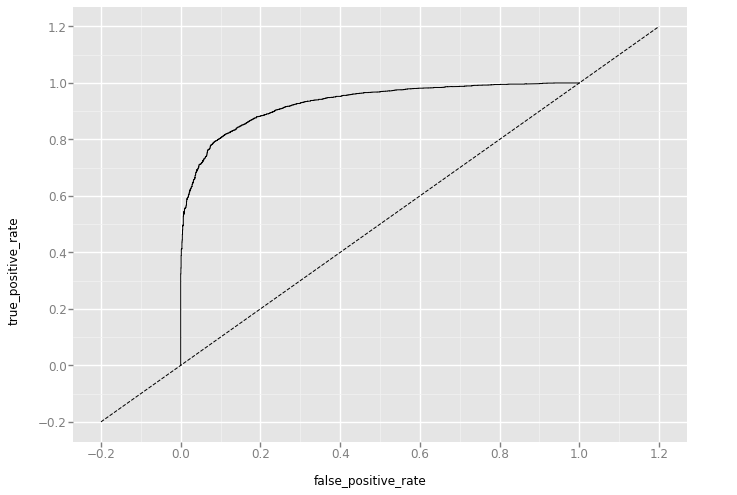

<ggplot: (-9223371913229961742)>

In [129]:
#Plotting ROC Curve 
import sklearn.metrics as metrics
from ggplot import *
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = NB_model.predict_proba(x_test_vectorized)
preds = probs[:,1]
false_positive_rate , true_positive_rate, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

#plot ROC Curve

df = pd.DataFrame(dict(false_positive_rate = false_positive_rate, true_positive_rate = true_positive_rate))
ggplot(df, aes(x = 'false_positive_rate', y = 'true_positive_rate')) + geom_line() + geom_abline(linetype = 'dashed')

# Logistic Regression

In [97]:
LR_model = LogisticRegression(solver = 'lbfgs')
LR_model.fit(x_train_vectorized, y_train)
print(classification_report(y_true = y_test, y_pred = LR_model.predict(x_test_vectorized), target_names = ["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.82      0.88      0.85      2000
        Real       0.87      0.81      0.84      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.84      0.84      4000



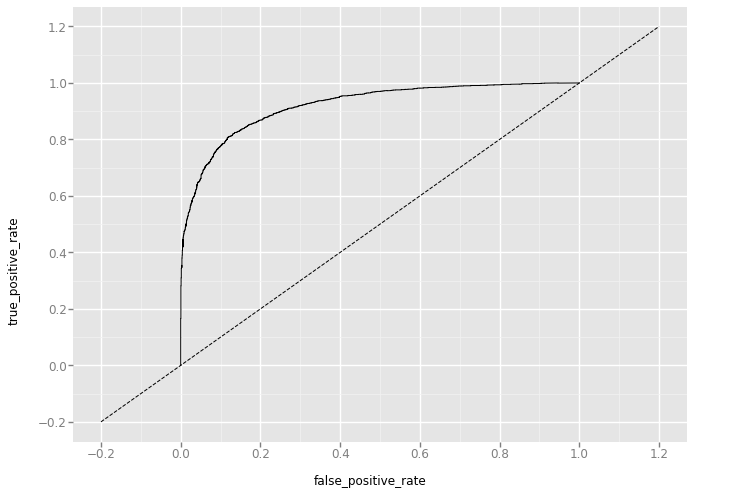

<ggplot: (-9223371913095955477)>

In [130]:
#Plotting ROC Curve 
import sklearn.metrics as metrics
from ggplot import *
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = LR_model.predict_proba(x_test_vectorized)
preds = probs[:,1]
false_positive_rate , true_positive_rate, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

#plot ROC Curve

df = pd.DataFrame(dict(false_positive_rate = false_positive_rate, true_positive_rate = true_positive_rate))
ggplot(df, aes(x = 'false_positive_rate', y = 'true_positive_rate')) + geom_line() + geom_abline(linetype = 'dashed')

In [48]:
model_id = "3"

# Save Models
pickle.dump(SVM_model, open("models/News/SVM/news_model-" + model_id + ".pl","wb"))
pickle.dump(LR_model, open("models/News/LR/news_model-" + model_id + ".pl","wb"))
pickle.dump(NB_model, open("models/News/NB/news_model-" + model_id + ".pl","wb"))

# Save Vectors
pickle.dump(vectorizer, open('vectors/News/vector-' + model_id + '.pl',"wb"))

## Toxicity Classifier

In [102]:
toxic_df = pd.read_csv("train.csv", encoding='utf-8')

In [103]:
toxic_df.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [104]:
toxic_df.loc[toxic_df['severe_toxic'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['obscene'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['threat'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['insult'] == 1,"toxic"] = 1
# toxic_df.loc[toxic_df['identity_hate'] == 1,"toxic"] = 1

In [105]:
# Toxic Vectors
toxic = list(toxic_df.loc[toxic_df['toxic'] == 1].comment_text)
nontoxic = list(toxic_df.loc[toxic_df['toxic'] == 0].comment_text)

In [106]:
len(toxic),len(nontoxic)

(15294, 144277)

In [107]:
train_size = 4000
test_size = 2000

In [108]:
# Training Set
x_train = toxic[:train_size] + nontoxic[:train_size]
y_train = [1 for _ in range(train_size)] + [0 for _ in range(train_size)]

In [109]:
# Testing Set
x_test = toxic[train_size : train_size + test_size] + nontoxic[train_size : train_size + test_size]
y_test = [1 for _ in range(test_size)] + [0 for _ in range(test_size)]

In [110]:
# TF - IDF Vector
vectorizer = TfidfVectorizer(ngram_range=(1,3))
x_train_vectorized_toxic = vectorizer.fit_transform(x_train)
x_test_vectorized_toxic = vectorizer.transform(x_test)

### Support Vector Machine

In [120]:
SVM_model_toxic = LinearSVC()
SVM_model_toxic.fit(x_train_vectorized_toxic, y_train)
print(classification_report(y_true = y_test, y_pred = SVM_model_toxic.predict(x_test_vectorized_toxic), target_names = ["Fake", "Real"]))

              precision    recall  f1-score   support

        Fake       0.86      0.88      0.87      2000
        Real       0.88      0.86      0.87      2000

   micro avg       0.87      0.87      0.87      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.87      0.87      0.87      4000



### Naive Bayes

In [118]:
NB_model_toxic = MultinomialNB()
NB_model_toxic.fit(x_train_vectorized_toxic, y_train)
print(classification_report(y_true = y_test, y_pred = NB_model_toxic.predict(x_test_vectorized_toxic), target_names = ["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.78      0.94      0.85      2000
        Real       0.92      0.73      0.82      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.83      4000
weighted avg       0.85      0.84      0.83      4000



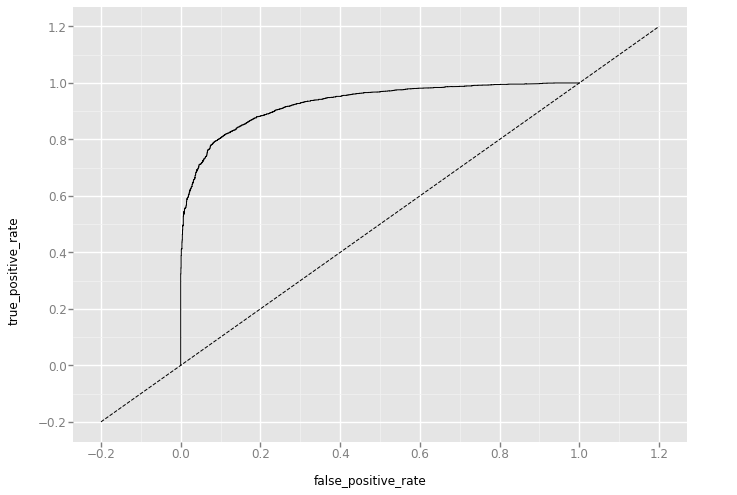

<ggplot: (123804764115)>

In [131]:
import sklearn.metrics as metrics
from ggplot import *
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = NB_model_toxic.predict_proba(x_test_vectorized)
preds = probs[:,1]
false_positive_rate , true_positive_rate, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

#plot ROC Curve

df = pd.DataFrame(dict(false_positive_rate = false_positive_rate, true_positive_rate = true_positive_rate))
ggplot(df, aes(x = 'false_positive_rate', y = 'true_positive_rate')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
import sklearn.metrics as metrics
from ggplot import *
# calculate the fpr and tpr for all thresholds of the classification
probs = LR_model.predict_proba(x_test_vectorized)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method II: ggplot

df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

### Logistic Regression

In [113]:
LR_model_toxic = LogisticRegression(solver = 'lbfgs')
LR_model_toxic.fit(x_train_vectorized_toxic, y_train)
print(classification_report(y_true = y_test, y_pred = LR_model_toxic.predict(x_test_vectorized_toxic), target_names = ["Fake", "Real"]))


              precision    recall  f1-score   support

        Fake       0.82      0.88      0.85      2000
        Real       0.87      0.81      0.84      2000

   micro avg       0.84      0.84      0.84      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.84      0.84      4000



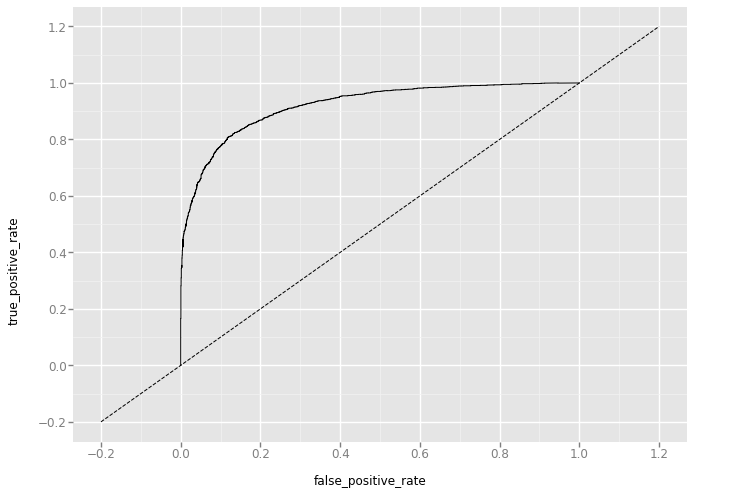

<ggplot: (-9223371913048599429)>

In [132]:
import sklearn.metrics as metrics
from ggplot import *
# calculate the false positive rate and true positive rate for all thresholds of the classification
probs = LR_model_toxic.predict_proba(x_test_vectorized)
preds = probs[:,1]
false_positive_rate , true_positive_rate, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)

#plot ROC Curve

df = pd.DataFrame(dict(false_positive_rate = false_positive_rate, true_positive_rate = true_positive_rate))
ggplot(df, aes(x = 'false_positive_rate', y = 'true_positive_rate')) + geom_line() + geom_abline(linetype = 'dashed')

In [45]:
pickle.dump(LR_model, open("model-1.toxic","wb"))
pickle.dump(vectorizer, open("vector-1.toxic","wb"))